In [5]:
!pip install SimpleITK


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 21.0 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import zipfile

zip_folder = "/content/drive/MyDrive/MLST_Lung_Cancer_Detection_And_Classification/LUNA16"
output_dataset = "/content/drive/MyDrive/MLST_Lung_Cancer_Detection_And_Classification/LUNA16_merged"

os.makedirs(output_dataset, exist_ok=True)


In [3]:
import shutil

temp_extract = "/content/temp_extract"
os.makedirs(temp_extract, exist_ok=True)

zip_files = [f for f in os.listdir(zip_folder) if f.endswith(".zip")]
print("Found ZIP files:", zip_files)

for z in zip_files:
    zip_path = os.path.join(zip_folder, z)
    print(f"Extracting {z}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_extract)

print("\nExtraction completed.\n")

count = 0
for root, dirs, files in os.walk(temp_extract):
    for f in files:
        if f.endswith(".mhd") or f.endswith(".raw"):
            src = os.path.join(root, f)
            dst = os.path.join(output_dataset, f)
            if os.path.exists(dst):
                name, ext = os.path.splitext(f)
                dst = os.path.join(output_dataset, f"{name}_{count}{ext}")
            shutil.move(src, dst)
            count += 1

print(f"Moved {count} files (.mhd/.raw) into: {output_dataset}")

shutil.rmtree(temp_extract)
print("\nTemporary folder deleted:", temp_extract)


Found ZIP files: ['reduced_subset6.zip', 'reduced_subset7.zip', 'reduced_subset8.zip', 'reduced_subset3.zip', 'reduced_subset4.zip', 'reduced_subset5.zip', 'reduced_subset0.zip', 'reduced_subset1.zip', 'reduced_subset2.zip']
Extracting reduced_subset6.zip...


KeyboardInterrupt: 

Found .mhd files: ['1.3.6.1.4.1.14519.5.2.1.6279.6001.255999614855292116767517149228.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.238855414831158993232534884296.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.238042459915048190592571019348.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.258220324170977900491673635112.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.246589849815292078281051154201.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.262736997975960398949912434623.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.273525289046256012743471155680.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.299476369290630280560355838785.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.323408652979949774528873200770.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.296738183013079390785739615169.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.291539125579672469833850180824.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.301582691063019848479942618641.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.275755514659958628040305922764.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.3099558140

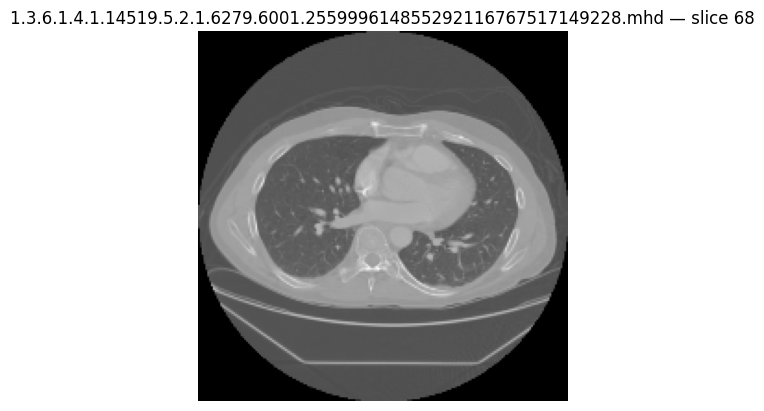

In [19]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt

merged_folder = "/content/drive/MyDrive/MLST_Lung_Cancer_Detection_And_Classification/LUNA16_merged"

# List all .mhd files
mhd_files = [f for f in os.listdir(merged_folder) if f.endswith(".mhd")]
print("Found .mhd files:", mhd_files)

# Use the first one
file_path = os.path.join(merged_folder, mhd_files[0])

# Load scan
image = sitk.ReadImage(file_path)
array = sitk.GetArrayFromImage(image)
print(f"{mhd_files[0]} shape: {array.shape}")

# Show middle slice
mid_slice = array.shape[0] // 2
plt.imshow(array[mid_slice], cmap='gray')
plt.title(f"{mhd_files[0]} — slice {mid_slice}")
plt.axis('off')
plt.show()


The slices we visualize with matplotlib are 2D slices of the 3D CT — essentially “pictures,” but they come from a volumetric scan.

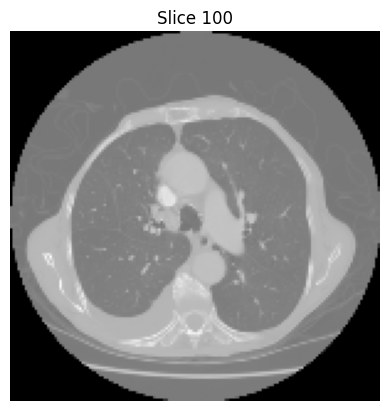

In [14]:
#If we want to look at a concrete slice
slice_idx = 100  # choose any number from 0 to array.shape[0]-1

plt.imshow(array[slice_idx], cmap='gray')
plt.title(f"Slice {slice_idx}")
plt.axis('off')
plt.show()


In [20]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

merged_folder = "/content/drive/MyDrive/MLST_Lung_Cancer_Detection_And_Classification/LUNA16_merged"

# Get all .mhd files
mhd_files = sorted([f for f in os.listdir(merged_folder) if f.endswith(".mhd")])
#print("Found scans:", mhd_files)

# Load all scans into a dictionary
dataset = {}
for f in mhd_files:
    file_path = os.path.join(merged_folder, f)
    image = sitk.ReadImage(file_path)
    array = sitk.GetArrayFromImage(image)
    dataset[f] = array
    #print(f"Loaded {f}, shape: {array.shape}")

# --- Optional: interactive visualization ---
def show_slice(scan_name, slice_idx):
    array = dataset[scan_name]
    plt.imshow(array[slice_idx], cmap='gray')
    plt.title(f"{scan_name} — Slice {slice_idx}")
    plt.axis('off')
    plt.show()

# Widgets for browsing
scan_dropdown = widgets.Dropdown(options=mhd_files, description='Scan:')
slice_slider = widgets.IntSlider(min=0, max=max(dataset[mhd_files[0]].shape[0]-1, 0), step=1, description='Slice:')

def update_slider(*args):
    slice_slider.max = dataset[scan_dropdown.value].shape[0] - 1

scan_dropdown.observe(update_slider, 'value')

widgets.interact(show_slice, scan_name=scan_dropdown, slice_idx=slice_slider)


interactive(children=(Dropdown(description='Scan:', options=('1.3.6.1.4.1.14519.5.2.1.6279.6001.10022528722236…

<function __main__.show_slice(scan_name, slice_idx)>

In [18]:
# Check slice count range across all scans
slice_counts = {name: arr.shape[0] for name, arr in dataset.items()}

print("Slice count per scan:")
for name, count in slice_counts.items():
    print(f"{name}: {count}")

min_slices = min(slice_counts.values())
max_slices = max(slice_counts.values())

print(f"\nMinimum number of slices: {min_slices}")
print(f"Maximum number of slices: {max_slices}")


Slice count per scan:
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd: 140
1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053.mhd: 120
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208.mhd: 113
1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.mhd: 118
1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543.mhd: 126
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd: 128
1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd: 123
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.mhd: 133
1.3.6.1.4.1.14519.5.2.1.6279.6001.101228986346984399347858840086.mhd: 128
1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797.mhd: 112
1.3.6.1.4.1.14519.5.2.1.6279.6001.103115201714075993579787468219.mhd: 110
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217.mhd: 112
1.3.6.1.4.1.14519.5.2.1.6279.6001.104780906131535625872840889059.mhd: 136
1.3.6.1.4.1.1451

In [12]:
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
pio.renderers.default = "colab"

# Small random 3D array for testing
test_array = np.random.rand(50, 50, 50)

fig = go.Figure(data=go.Volume(
    x=np.arange(test_array.shape[2]).repeat(test_array.shape[1]*test_array.shape[0]),
    y=np.tile(np.arange(test_array.shape[1]).repeat(test_array.shape[0]), test_array.shape[2]),
    z=np.tile(np.arange(test_array.shape[0]), test_array.shape[1]*test_array.shape[2]),
    value=test_array.flatten(),
    opacity=0.1,
    surface_count=15,
    colorscale='Gray'
))

fig.show()
#3D too heavy to load, either we downsample more or use 2D slices for one scan which is showcased above

Output hidden; open in https://colab.research.google.com to view.